In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import lines, markers

In [2]:
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False

In [3]:
cluster_samples_clustered = pd.read_csv('./results/samples_cluster_clustered.csv').drop('Unnamed: 0', axis=1)
cluster_samples_uniform = pd.read_csv('./results/samples_clusters_uniform.csv').drop('Unnamed: 0', axis=1)
kd_tree_clustered = pd.read_csv('./results/kd_tree_clustered_rest.csv').drop('Unnamed: 0', axis=1)
kd_tree_uniform = pd.read_csv('./results/kd_tree_uniform_all.csv').drop('Unnamed: 0', axis=1)

In [5]:
mean_std_clustered = cluster_samples_clustered.groupby('k').mean()
mean_std_uniform = cluster_samples_uniform.groupby('k').mean()
mean_std_kd_clustered = kd_tree_clustered.groupby('k').mean()
mean_std_kd_uniform = kd_tree_uniform.groupby('k').mean()

In [6]:
def generate_figure(mean_std, xlabel, which):
    fig, ax = plt.subplots(1,1)
    
    ax.plot(mean_std.index, mean_std[f'Base Model_{which}'], linestyle='-', marker='o', label='Base Model')
    ax.plot(mean_std.index, mean_std[f'Naive Bayes_{which}'], linestyle='--', marker='P', label='Naive Bayes')
    ax.plot(mean_std.index, mean_std[f'Decision Tree_{which}'], linestyle=":", marker='^', label= 'Decision Tree')
    ax.plot(mean_std.index, mean_std[f'Random Forest_{which}'], linestyle=":", marker='^', label= 'Random Forest')
    ax.plot(mean_std.index, mean_std[f'Linear SVM_{which}'], '--', marker='*',  label= 'Linear SVM')
    ax.plot(mean_std.index, mean_std[f'RBF SVM_{which}'], '--', marker='*',  label= 'RBF SVM')
    ax.plot(mean_std.index, mean_std[f'MLP_{which}'], linestyle=":", marker='^', label= 'MLP')

    plt.legend()
    plt.ylim(0, 1.1)
    plt.xlabel(xlabel)
    plt.ylabel(f'{which} Accuracy')
    plt.tight_layout()

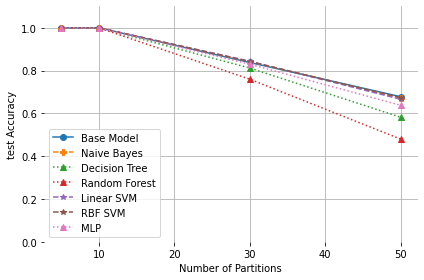

In [15]:
generate_figure(mean_std_clustered.drop(100), 'Number of Partitions', 'test')
plt.savefig('./figures/kmeans_clustered_test.png')

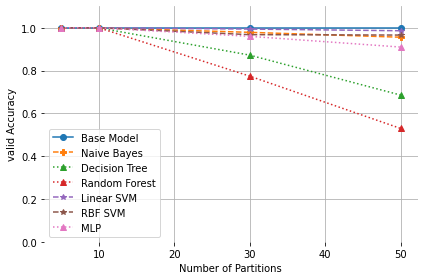

In [16]:
generate_figure(mean_std_clustered.drop(100), 'Number of Partitions', 'valid')
plt.savefig('./figures/kmeans_clustered_valid.png')

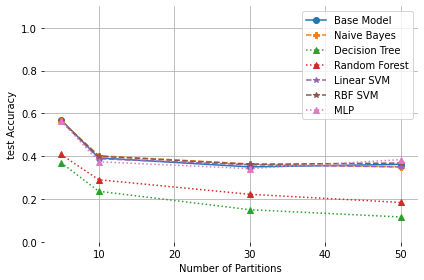

In [17]:
generate_figure(mean_std_uniform.drop(100), 'Number of Partitions', 'test')
plt.savefig('./figures/kmeans_uniform_test.png')

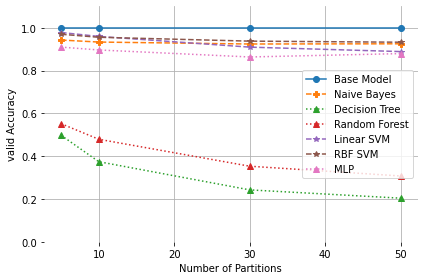

In [18]:
generate_figure(mean_std_uniform.drop(100), 'Number of Partitions', 'valid')
plt.savefig('./figures/kmeans_uniform_valid.png')

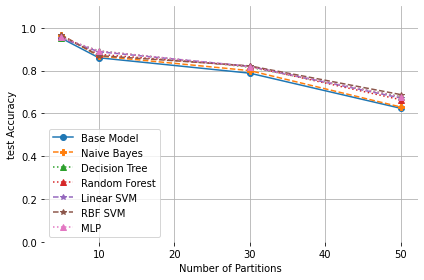

In [19]:
generate_figure(mean_std_kd_clustered, 'Number of Partitions', 'test')
plt.savefig('./figures/kdtree_clustered_test.png')

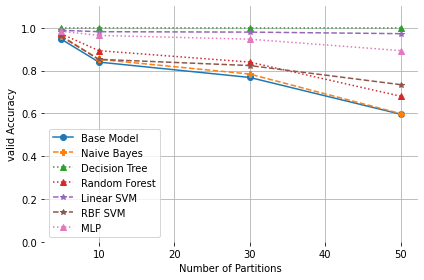

In [20]:
generate_figure(mean_std_kd_clustered, 'Number of Partitions', 'valid')
plt.savefig('./figures/kdtree_clustered_valid.png')

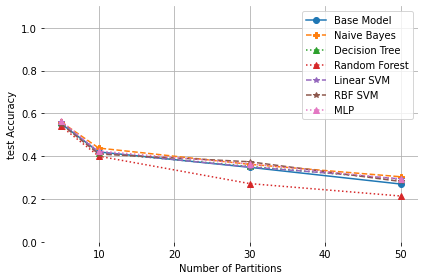

In [21]:
generate_figure(mean_std_kd_uniform, 'Number of Partitions', 'test')
plt.savefig('./figures/kdtree_uniform_test.png')

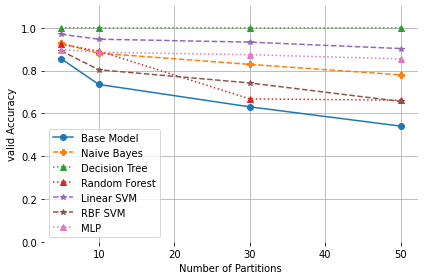

In [22]:
generate_figure(mean_std_kd_uniform,'Number of Partitions', 'valid')
plt.savefig('./figures/kdtree_uniform_valid.png')